**1 How do you create a simple perceptron for basic binary classification!**

In [1]:
import numpy as np

# Step 1: Define the dataset (binary classification example)
# Input features (X) and labels (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Logical AND
y = np.array([0, 0, 0, 1])  # Target outputs

# Step 2: Initialize weights and bias
weights = np.random.rand(2)  # Two weights for two features
bias = np.random.rand()  # One bias
learning_rate = 0.1  # Learning rate for weight updates

# Step 3: Define the step activation function
def step_function(weighted_sum):
    return 1 if weighted_sum >= 0 else 0

# Step 4: Train the perceptron
epochs = 10  # Number of training iterations
for epoch in range(epochs):
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = np.dot(X[i], weights) + bias
        # Apply the activation function
        prediction = step_function(weighted_sum)
        # Calculate the error
        error = y[i] - prediction
        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# Step 5: Test the perceptron
def predict(input_data):
    weighted_sum = np.dot(input_data, weights) + bias
    return step_function(weighted_sum)

# Testing
for input_data in X:
    print(f"Input: {input_data}, Prediction: {predict(input_data)}")


Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


**2. How can you build a neural network with one hidden layer using Keras!**

In [2]:
# Step 1: Import libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# Step 2: Prepare the dataset
# Generate a synthetic binary classification dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the model architecture
model = Sequential([
    Dense(10, input_dim=2, activation='relu'),  # Hidden layer with 10 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 7: Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1995 - loss: 0.7829
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2787 - loss: 0.7425 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4574 - loss: 0.7084
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6356 - loss: 0.6742 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8461 - loss: 0.6351  
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8747 - loss: 0.5990
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8766 - loss: 0.5634  
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8869 - loss: 0.5284
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8576 - loss: 0.5087
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8663 - loss: 0.4747 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.4554 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8

**3. How do you initialize weights using the Xavier (Glorot) initialization method in Keras!**

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import glorot_uniform, glorot_normal

# Define the model
model = Sequential([
    Dense(10, input_dim=2, activation='relu', kernel_initializer=glorot_uniform()),  # Xavier Uniform
    Dense(1, activation='sigmoid', kernel_initializer=glorot_normal())  # Xavier Normal
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to check initializers
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

**4. How can you apply different activation functions in a neural network in Keras!**

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# Define the model
model = Sequential([
    Dense(32, input_dim=8, activation='relu'),  # ReLU activation
    Dense(16, activation='tanh'),               # Tanh activation
    Dense(8),                                   # No activation (linear by default)
    Activation('sigmoid')                       # Sigmoid applied separately
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 952 (3.72 KB)

 Trainable params: 952 (3.72 KB)

 Non-trainable params: 0 (0.00 B)

**5. How do you add dropout to a neural network model to prevent overfitting!**

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(128, input_dim=20, activation='relu'),  # Input layer
    Dropout(0.3),  # Dropout with 30% rate
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.5),  # Dropout with 50% rate
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

**6. How do you manually implement forward propagation in a simple neural network!**

In [6]:
import numpy as np

# Define the activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the neural network parameters (weights and biases)
# Random initialization
np.random.seed(42)  # For reproducibility
weights_hidden = np.random.rand(2, 3)  # 2 inputs -> 3 neurons
bias_hidden = np.random.rand(3)        # Bias for 3 neurons in hidden layer

weights_output = np.random.rand(3, 1)  # 3 inputs -> 1 output
bias_output = np.random.rand(1)        # Bias for the output neuron

# Input data (example with a single data point)
X = np.array([0.5, 0.8])  # Input with 2 features

# Forward propagation
# Step 1: Hidden layer
Z_hidden = np.dot(X, weights_hidden) + bias_hidden  # Weighted sum for hidden layer
A_hidden = relu(Z_hidden)  # Apply ReLU activation

# Step 2: Output layer
Z_output = np.dot(A_hidden, weights_output) + bias_output  # Weighted sum for output layer
A_output = sigmoid(Z_output)  # Apply Sigmoid activation

# Print the final output
print("Output of the neural network:", A_output)


Output of the neural network: [0.91942216]


**7. How do you add batch normalization to a neural network model in Keras!**

In [7]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation

# Define the model
model = Sequential([
    Dense(128, input_dim=20),                  # Fully connected layer
    BatchNormalization(),                     # Batch normalization
    Activation('relu'),                       # Activation function
    Dense(64),                                # Another fully connected layer
    BatchNormalization(),                     # Batch normalization
    Activation('relu'),
    Dense(1, activation='sigmoid')            # Output layer with sigmoid
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 384 (1.50 KB)

**8. How can you visualize the training process with accuracy and loss curves**

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5238 - loss: 0.6989 - val_accuracy: 0.4700 - val_loss: 0.7009
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5345 - loss: 0.6888 - val_accuracy: 0.4900 - val_loss: 0.6981
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5227 - loss: 0.6895 - val_accuracy: 0.5200 - val_loss: 0.6988
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5322 - loss: 0.6845 - val_accuracy: 0.5450 - val_loss: 0.6986
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6051 - loss: 0.6738 - val_accuracy: 0.5000 - val_loss: 0.7087
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5626 - loss: 0.6756 - val_accuracy: 0.5700 - val_loss: 0.6975
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5726 - loss: 0.6736 - val_accuracy: 0.5400 - val_loss: 0.7074
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5900 - loss: 0.6675 - val_accuracy: 0.5250 - val_

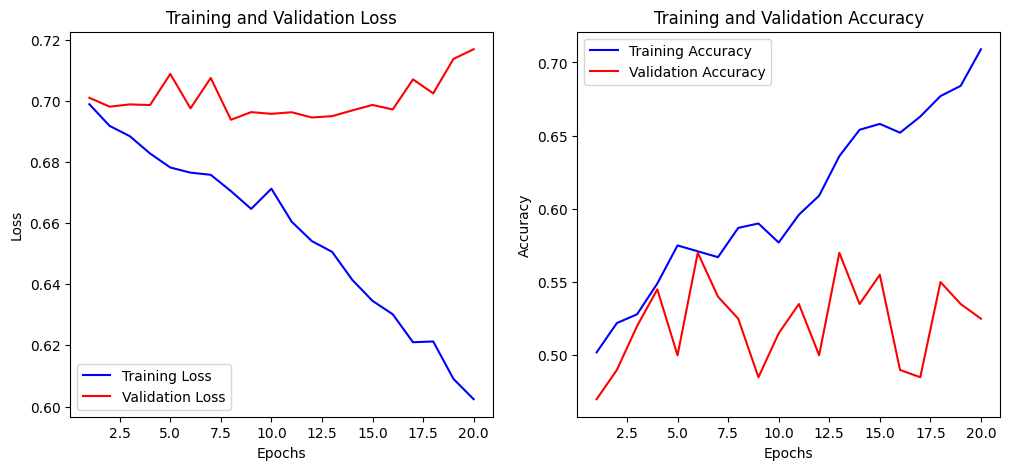

In [8]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Define a simple model
model = Sequential([
    Dense(128, input_dim=20, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate synthetic data for demonstration
import numpy as np
X_train = np.random.rand(1000, 20)  # 1000 samples, 20 features
y_train = np.random.randint(0, 2, 1000)  # Binary labels

X_val = np.random.rand(200, 20)  # Validation data
y_val = np.random.randint(0, 2, 200)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Visualize training history
def plot_training_history(history):
    # Extract data
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Call the function to plot
plot_training_history(history)


**9. How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients!**

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define a simple model
model = Sequential([
    Dense(128, input_dim=20, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with gradient norm clipping
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # Clip gradients by their L2 norm
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Generate synthetic data
import numpy as np
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(0, 2, 1000)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4853 - loss: 0.6999
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5219 - loss: 0.6962  
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5193 - loss: 0.6875 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5393 - loss: 0.6847 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6066 - loss: 0.6782 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5754 - loss: 0.6788 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5758 - loss: 0.6722
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5831 - loss: 0.6684 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5741 - loss: 0.6661
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6147 - loss: 0.6600 


**10. How can you create a custom loss function in Keras!**

In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Define a custom Mean Squared Error loss function
def custom_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Create a simple model
model = Sequential([
    Dense(128, input_dim=10, activation='relu'),
    Dense(1)  # Regression output
])

# Compile the model with the custom loss function
model.compile(optimizer='adam', loss=custom_mse)

# Generate synthetic data
import numpy as np
X_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000, 1)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2304
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0976
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0895
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0885
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0810
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0857
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0824
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0830
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0839
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0817


In [11]:
def custom_huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * tf.abs(error) - 0.5 * tf.square(delta)
    return tf.reduce_mean(tf.where(is_small_error, squared_loss, linear_loss))

# Compile with custom Huber loss
model.compile(optimizer='adam', loss=lambda y_true, y_pred: custom_huber_loss(y_true, y_pred, delta=1.0))


In [12]:
def custom_weighted_mse(weight):
    def loss(y_true, y_pred):
        return tf.reduce_mean(weight * tf.square(y_true - y_pred))
    return loss

# Compile with the weighted MSE loss
model.compile(optimizer='adam', loss=custom_weighted_mse(weight=0.5))


**11 How can you visualize the structure of a neural network model in Keras**

In [13]:
from keras.models import Sequential
from keras.layers import Dense

# Define a simple model
model = Sequential([
    Dense(128, input_dim=10, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

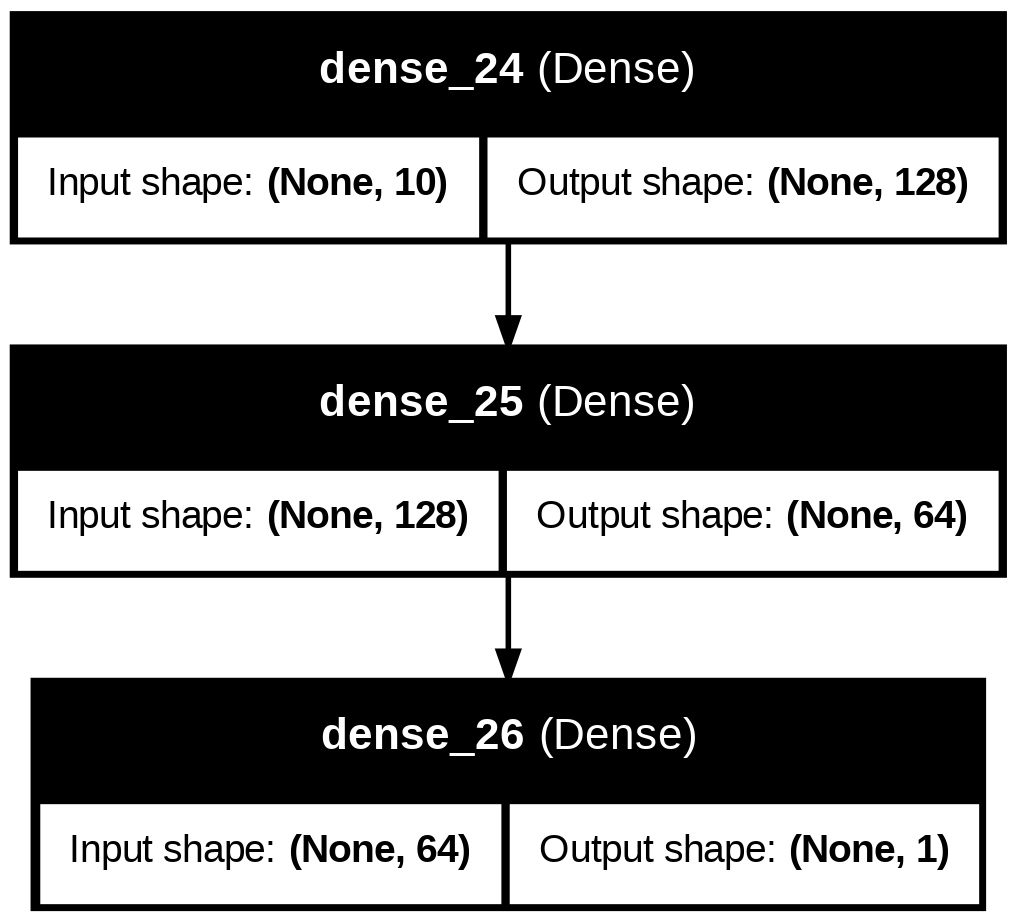

In [14]:
from keras.utils import plot_model

# Define a simple model
model = Sequential([
    Dense(128, input_dim=10, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Generate a plot of the model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)
